# **Import Libs**

In [ ]:
#Set path to MAIN FOLDER OF EXPERIMENT
#cd /path/to/EXPERIMENT_FOLDER/

/content/drive/My Drive/PSR


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pickle
import math
import os
%matplotlib inline

In [4]:
#Define Constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

#Data paths
TRAIN_DATA_path = 'ds/train/'
VAL_DATA_PATH = 'ds/val/'
TEST_DATA_PATH = 'ds/test/'

#Get data from generator
def get_data(generator, nb_samples):  
    from tqdm.notebook import tqdm
    x = []
    y = []

    for i in tqdm(range(math.ceil(nb_samples/BATCH_SIZE))):
        x.extend(generator[i][0])
        y.extend(generator[i][1])

    x = np.array(x)
    y = np.array(y)
    return x, y

#Create {index:classs_name} dictionary
def index_class_dict():
	  file_names = os.listdir('ds/test/')
	  file_names = sorted(file_names)
	  index_class = {}
	  for i in range(len(file_names)):
	      index_class[i] = file_names[i]

	  return index_class

#Save Figure Function
def savefigure(directory, fig_name):
    if not os.path.exists(directory):
        os.makedirs(directory)
    plt.savefig(directory + '/' + fig_name + '.tiff', bbox_inches='tight', dpi=600, format='tiff')

# **Load Data**

In [7]:
#Create Generator from datapath
datagen = ImageDataGenerator()

train_generator = datagen.flow_from_directory(TRAIN_DATA_path, 
                                                    target_size=IMAGE_SIZE, 
                                                    batch_size=BATCH_SIZE,
                                                    color_mode="grayscale", 
                                                    class_mode='sparse',
                                                    shuffle=False)

validation_generator = datagen.flow_from_directory(VAL_DATA_PATH, 
                                                        target_size=IMAGE_SIZE, 
                                                        batch_size=BATCH_SIZE,
                                                        color_mode="grayscale", 
                                                        class_mode='sparse',
                                                        shuffle=False)

test_generator = datagen.flow_from_directory(TEST_DATA_PATH, 
                                                  target_size=IMAGE_SIZE, 
                                                  batch_size=BATCH_SIZE,
                                                  color_mode="grayscale", 
                                                  class_mode='sparse',
                                                  shuffle=False)

nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(validation_generator.filenames)
nb_test_samples = len(test_generator.filenames)
num_classes= len(train_generator.class_indices)

print('NUMBER OF TRAIN SAMPLES:', nb_train_samples)
print('NUMBER OF VALIDATION SAMPLES:',nb_validation_samples)
print('NUMBER OF TEST SAMPLES:',nb_test_samples)
print('TOTAL CLASSES:', num_classes)

Found 1990 images belonging to 199 classes.
Found 1194 images belonging to 199 classes.
Found 796 images belonging to 199 classes.
NUMBER OF TRAIN SAMPLES: 1990
NUMBER OF VALIDATION SAMPLES: 1194
NUMBER OF TEST SAMPLES: 796
TOTAL CLASSES: 199


In [8]:
#Get training data in x, y format
print("[INFO] Loading Training Data")
x_train, y_train = get_data(train_generator, nb_train_samples)

print("[INFO] Loading Validation Data")
x_val, y_val = get_data(validation_generator, nb_validation_samples)

print("[INFO] Loading Testing Data")
x_test, y_test = get_data(test_generator, nb_test_samples)

[INFO] Loading Training Data



[INFO] Loading Validation Data



[INFO] Loading Testing Data


In [9]:
print("[INFO] DATA PREPARATION")
#Reshape data into (n_samples, features)
x_train=np.reshape(x_train[:], (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_val=np.reshape(x_val[:], (x_val.shape[0], x_val.shape[1]*x_val.shape[2]))
x_test=np.reshape(x_test[:], (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

#Normalize & combine training, validation and test data
x_train=x_train*(1.0/255)
x_val=x_val*(1.0/255)
x_test=x_test*(1.0/255)

X=np.concatenate((x_train, x_val, x_test))
y=np.concatenate((y_train, y_val, y_test))
y = y.astype(int)

[INFO] DATA PREPARATION


# **TNSE PLOT**

**Apply PCA**

In [10]:
print("[INFO] APPLY PCA TO GET TOP 25 FEATURES FROM ORGINAL DATA")
pca = PCA(n_components=25)
X_pca = pca.fit_transform(X)

[INFO] APPLY PCA TO GET TOP 25 FEATURES FROM ORGINAL DATA


**Apply TSNE**

In [11]:
print("[INFO] APPLY TSNE TO GET TOP 2 FEATURES FROM PCA DATA")
tsne = TSNE(n_components=2, perplexity=7, learning_rate=10.0, verbose=1, n_iter=5000)
data_2d = tsne.fit_transform(X_pca)

[INFO] APPLY TSNE TO GET TOP 2 FEATURES FROM PCA DATA
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 3980 samples in 0.022s...
[t-SNE] Computed neighbors for 3980 samples in 0.946s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3980
[t-SNE] Computed conditional probabilities for sample 2000 / 3980
[t-SNE] Computed conditional probabilities for sample 3000 / 3980
[t-SNE] Computed conditional probabilities for sample 3980 / 3980
[t-SNE] Mean sigma: 5.053904
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.553894
[t-SNE] KL divergence after 5000 iterations: 1.686719


**Visualize Output**

In [12]:
print("[INFO] SET COLORS AND MARKERS")
#Get {index:class} dictionary
index_class = index_class_dict()

#Set markers and colors
colors = [ 'brown', 'tomato', 'orange', 'crimson', 'olive', 'green', 'springgreen', 
          'red', 'darkcyan', 'gray','midnightblue', 'dodgerblue', 'purple', 'hotpink', "indigo", "steelblue" ] 
markers =['o','1','^','8','+','s','p','P','*','h','X','D','|']
colors_markers = {}
i=0
for c in colors:
    for m in markers:
        colors_markers[i] = (c, m)
        i+=1

[INFO] SET COLORS AND MARKERS


[INFO] TSNE PLOT



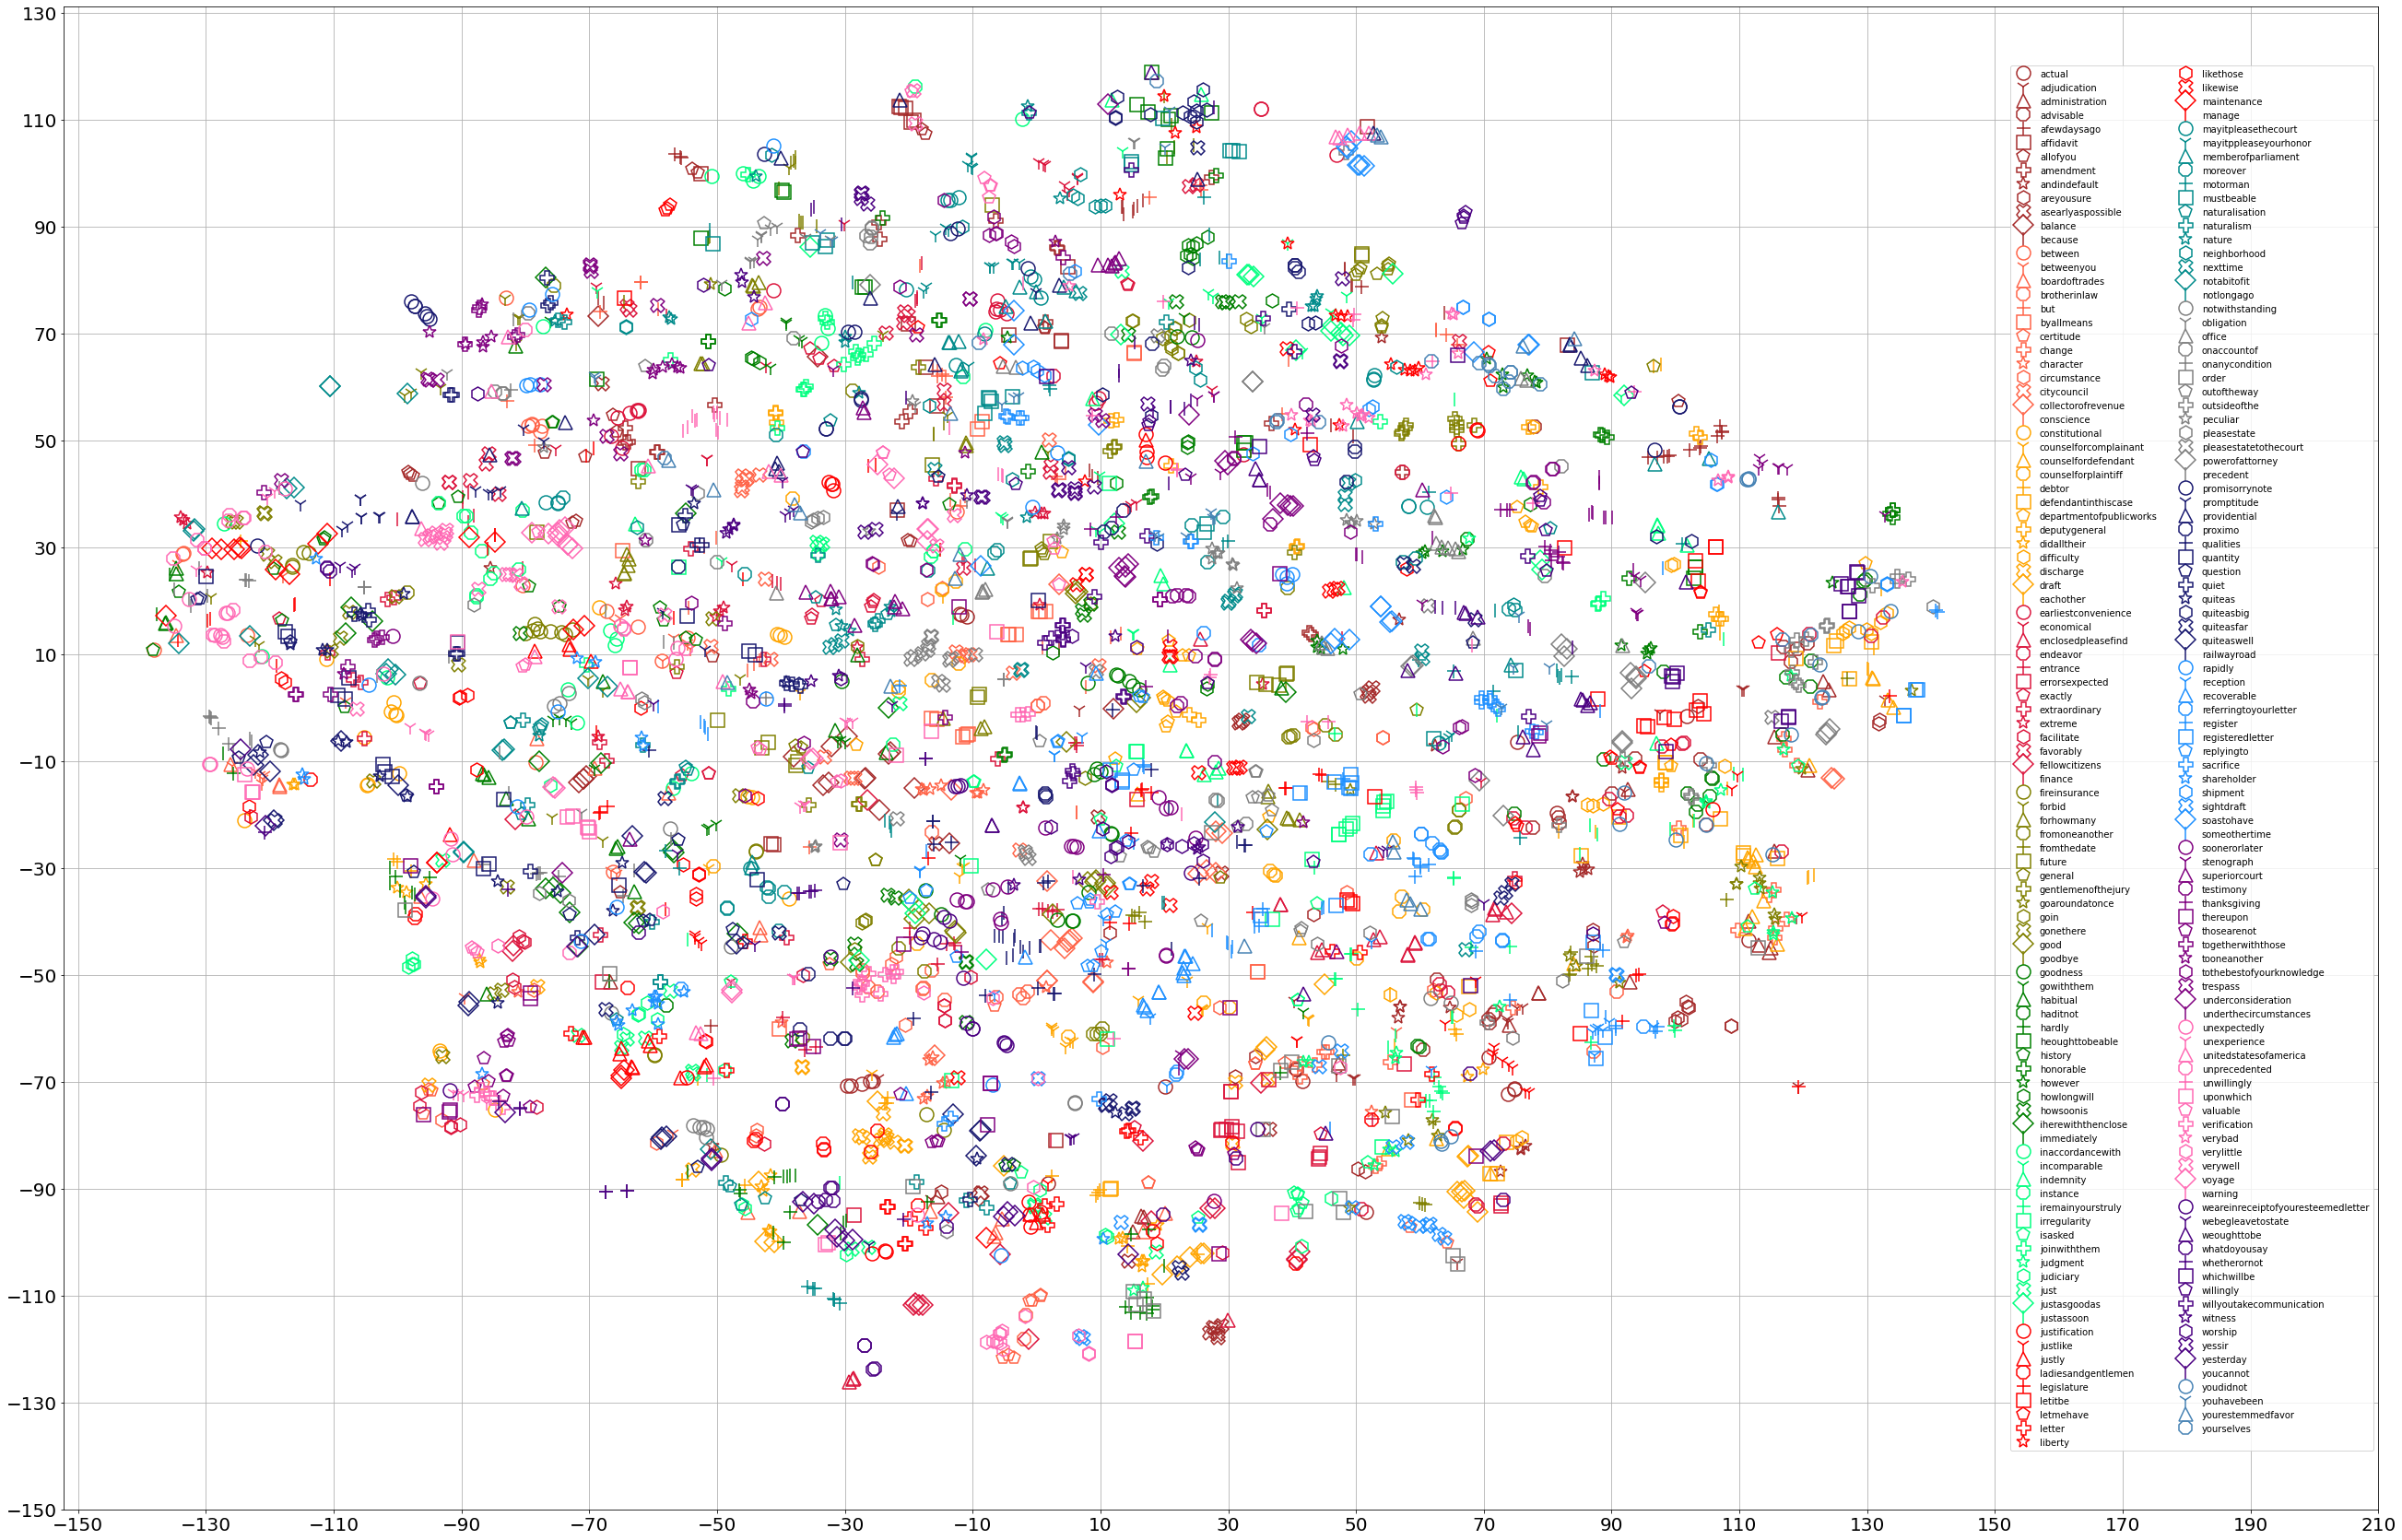

[INFO] FIGURE SAVED


In [13]:
print("[INFO] TSNE PLOT\n")
plt.figure(figsize=(45,30))
legends = []
for i in range(num_classes):
    plt.plot(data_2d[y==i][:, 0], data_2d[y==i][:, 1],
                 ms=15,
                 linestyle='none', 
                 color=colors_markers[i][0],
                 marker=colors_markers[i][1],
                 fillstyle='none', 
                 markeredgewidth=1.5)
    legends.append(index_class[i])

plt.legend(legends, loc='right', ncol=2)
plt.xticks(np.arange(-150, 211, step=20),fontsize=20)
plt.yticks(np.arange(-150, 131, step=20),fontsize=20)
plt.grid(True, ls='-')
savefigure('figures/', 'tsne.tiff')
plt.show()
print("[INFO] FIGURE SAVED")